## Import Libraries and Data

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
total_data=pd.read_excel('/Users/nickstatz/Desktop/CornYield/ALLDATA.xlsx')

Soil=['AWC Average','CEC Average','OCD Average']
Sat=['EVI Average','NDVI Average','GCI Average','NDWI Average']
Clim=['PPT Average','MaxT Average','MeanT Average','MinT Average','vpdMax Average','vpdMin Average']

## Split Data into 2010-2019 and 2020

In [2]:
groups = total_data.groupby('Year')
test = groups.get_group(2020)
#find where 2020 starts FOUND 7976 is first 2020 value from print(total_data.loc[[7975]])
train = total_data.drop(total_data.index[7972:8864],axis=0,inplace=False)

## Train and Test Data (Adjust Indep Vars)

In [3]:
# now 2010-2019 is under train and 2020 is under test
x_train=train[Soil+Sat+Clim].values #x values to train on
y_train=train['Yield'].values                                                     #y values to train on
x_test=test[Soil+Sat+Clim].values   #x values to test on
y_score=test['Yield'].values   #true y valeus to score on

In [4]:
# do the regression
regressor = DecisionTreeRegressor(random_state=0) #splitter="best",max_depth=10,min_samples_leaf=60,min_weight_fraction_leaf=0.0,max_features=None,max_leaf_nodes=300,
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [5]:
# score results
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
RMSE=mean_squared_error(y_score, y_pred,squared=False) 
R2=r2_score(y_score, y_pred)
print('R2=',R2,' RMSE=',RMSE)

R2= 0.5034833082153688  RMSE= 22.140792354806425


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
RMSE=mean_squared_error(y_score, y_pred,squared=False) 
R2=r2_score(y_score, y_pred)
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_score, y_pred)
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_score, y_pred)
accuracy = 100 - np.mean(MAPE)
print('R2=',R2,' RMSE=',RMSE, ' MAE:',MAE, 'MAPE:',MAPE,'Accuracy:', round(accuracy, 2), '%.')

R2= 0.5034833082153688  RMSE= 22.140792354806425  MAE: 16.435874439461884 MAPE: 0.10935134600099206 Accuracy: 99.89 %.


<function matplotlib.pyplot.show(close=None, block=None)>

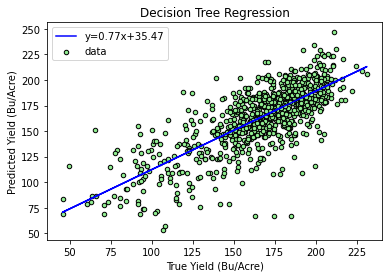

In [9]:
# plot results
from scipy import stats
plt.figure()
plt.scatter(y_score, y_pred, s=20, edgecolor="black", c="lightgreen", label="data")
slope, intercept, r_value, p_value, std_err = stats.linregress(y_score,y_pred)
line = slope*y_score+intercept
plt.plot(y_score, line, 'b', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel("True Yield (Bu/Acre)")
plt.ylabel("Predicted Yield (Bu/Acre)")
plt.title("Decision Tree Regression")
plt.legend()

plt.savefig("TreeBestSoil.jpeg")
plt.show